# import libraries

In [2]:
import pandas as pd
import numpy as np

import censusdata

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# data collection

## retrieve ten-year major data in detailed category (B15010) for people over 25 years

### define collection function ```CensusMajorDetail```

In [3]:
def CensusMajorDetail(year, est):
    df_major_detail = censusdata.download(est, year, censusdata.censusgeo([('county','*')]), 
                                   ['GEO_ID',
                                    'B15010_001E','B15010_002E','B15010_003E','B15010_004E',
                                    'B15010_005E','B15010_006E','B15010_007E',
                                    'B15010_008E','B15010_009E','B15010_010E','B15010_011E',
                                    'B15010_012E','B15010_013E','B15010_014E',
                                    'B15010_015E','B15010_016E']) 
    
    county = df_major_detail.reset_index()['index'].apply(lambda x: str(x).split(",")[0]).tolist()
    state = df_major_detail.reset_index()['index'].apply(lambda x: str(x).split(",")[1].split(':')[0].strip()).tolist()

    df_major_detail['County'] = county
    df_major_detail['State'] = state
    df_major_detail['Year'] = np.repeat(year,df_major_detail.shape[0])
    
    #the detailed coding can see 
    #https://www2.census.gov/programs-surveys/acs/tech_docs/code_lists/2021_ACS_Code_Lists.pdf
    
    df_major_detail.rename(columns =  
                           {'B15010_001E':'Total', #total population
                            'B15010_002E':'CS_Math_Stat',#CS, math, statistics
                            'B15010_003E':'Bio_Arg_Envi', #biology, agriculture, environment
                            'B15010_004E':'Physical_related', #phyiscs-related
                            'B15010_005E':'Psych', #pyschology
                            'B15010_006E':'Social_Sci', #social science
                            'B15010_007E':'Engineer', #engineering
                            'B15010_008E':'Multi', #multi-disciplinary
                            'B15010_009E':'SE_related', #science and enginnering related
                            'B15010_010E':'Biz', #business
                            'B15010_011E':'Edu', #education
                            'B15010_012E':'Lit_Lag', #literature and language
                            'B15010_013E':'LA_His', #libreal arts and history
                            'B15010_014E':'Arts', #arts
                            'B15010_015E':'Com', #communcation
                            'B15010_016E':'Other'}, # others
                           inplace=True)

    df_major_detail.reset_index(inplace = True)
    df_major_detail.drop(columns=['index'],inplace = True)
    
    return(df_major_detail)

### collect one-year estimate data

In [6]:
df_major_detail = pd.DataFrame()

for i in range(2010,2020):
    df_temp = CensusMajorDetail(i,'acs1') # only one-year estimate is available
    df_major_detail = pd.concat([df_major_detail,df_temp])

In [8]:
df_major_detail.head()

,GEO_ID,Total,CS_Math_Stat,Bio_Arg_Envi,Physical_related,Psych,Social_Sci,Engineer,Multi,SE_related,Biz,Edu,Lit_Lag,LA_His,Arts,Com,Other,County,State,Year
0,0500000US30031,24610.0,243.0,3311.0,701.0,1387.0,2075.0,2036.0,67.0,2425.0,3434.0,2770.0,1414.0,1299.0,1936.0,614.0,898.0,Gallatin County,Montana,2010
1,0500000US30063,29326.0,97.0,4119.0,1149.0,1399.0,3179.0,570.0,110.0,2885.0,4438.0,4212.0,1994.0,1379.0,1887.0,1100.0,808.0,Missoula County,Montana,2010
2,0500000US30111,31659.0,1149.0,2403.0,627.0,1523.0,2421.0,2047.0,67.0,3691.0,5952.0,5946.0,855.0,1642.0,1515.0,1056.0,765.0,Yellowstone County,Montana,2010
3,0500000US31055,119655.0,5611.0,8063.0,3758.0,5614.0,6838.0,5273.0,425.0,11044.0,30010.0,17213.0,3523.0,5542.0,3257.0,5053.0,8431.0,Douglas County,Nebraska,2010
4,0500000US31109,60914.0,1464.0,5094.0,1839.0,3181.0,3042.0,2839.0,240.0,7096.0,11812.0,11018.0,1665.0,2395.0,2200.0,2709.0,4320.0,Lancaster County,Nebraska,2010


In [9]:
df_major_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8297 entries, 0 to 839
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GEO_ID            8297 non-null   object 
 1   Total             8217 non-null   float64
 2   CS_Math_Stat      8217 non-null   float64
 3   Bio_Arg_Envi      8217 non-null   float64
 4   Physical_related  8217 non-null   float64
 5   Psych             8217 non-null   float64
 6   Social_Sci        8217 non-null   float64
 7   Engineer          8217 non-null   float64
 8   Multi             8217 non-null   float64
 9   SE_related        8217 non-null   float64
 10  Biz               8217 non-null   float64
 11  Edu               8217 non-null   float64
 12  Lit_Lag           8217 non-null   float64
 13  LA_His            8217 non-null   float64
 14  Arts              8217 non-null   float64
 15  Com               8217 non-null   float64
 16  Other             8217 non-null   float64
 

### preliminary data cleaning

#### check and drop missing values

In [10]:
df_major_detail[df_major_detail.isna().any(axis=1)]

,GEO_ID,Total,CS_Math_Stat,Bio_Arg_Envi,Physical_related,Psych,Social_Sci,Engineer,Multi,SE_related,Biz,Edu,Lit_Lag,LA_His,Arts,Com,Other,County,State,Year
808,0500000US12107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Putnam County,Florida,2010
809,0500000US21195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pike County,Kentucky,2010
810,0500000US12023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columbia County,Florida,2010
811,0500000US35031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McKinley County,New Mexico,2010
812,0500000US01127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walker County,Alabama,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0500000US06103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tehama County,California,2019
836,0500000US39101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marion County,Ohio,2019
837,0500000US35031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McKinley County,New Mexico,2019
838,0500000US01127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walker County,Alabama,2019


In [11]:
df_major_detail.dropna(inplace = True)

In [12]:
df_major_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8217 entries, 0 to 833
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GEO_ID            8217 non-null   object 
 1   Total             8217 non-null   float64
 2   CS_Math_Stat      8217 non-null   float64
 3   Bio_Arg_Envi      8217 non-null   float64
 4   Physical_related  8217 non-null   float64
 5   Psych             8217 non-null   float64
 6   Social_Sci        8217 non-null   float64
 7   Engineer          8217 non-null   float64
 8   Multi             8217 non-null   float64
 9   SE_related        8217 non-null   float64
 10  Biz               8217 non-null   float64
 11  Edu               8217 non-null   float64
 12  Lit_Lag           8217 non-null   float64
 13  LA_His            8217 non-null   float64
 14  Arts              8217 non-null   float64
 15  Com               8217 non-null   float64
 16  Other             8217 non-null   float64
 

#### calculate the percent of each detailed major category ```CalPercent```

In [13]:
def CalPercent(df, dv):
    dv_percent = dv
    df[dv_percent] = df[dv].values/df['Total'].values*100
    return df

In [14]:
for dv in df_major_detail.columns[2:17]:
    CalPercent(df_major_detail, dv)

#### aggregate the percent of each higher-level major category: SE (science & engineering), STEM, AHO(arts, humanities and others)

In [15]:
df_major_detail['SE'] =  df_major_detail[df_major_detail.columns[2:8]].sum(axis=1)

In [16]:
df_major_detail['STEM'] = df_major_detail[['SE', 'SE_related']].sum(axis=1)

In [17]:
df_major_detail['AHO'] =  df_major_detail[df_major_detail.columns[12:17]].sum(axis=1)

## create master datasets

### add covs: gini, income, population, log_income

In [18]:
df_gini = pd.read_csv('df_gini.csv')

In [19]:
df_un_master = pd.read_csv('df_un_master.csv')

In [20]:
df_master = df_major_detail.merge(df_gini,on = ['GEO_ID','Year','County','State'],how = 'inner')

### add cov: unemployment rate

In [21]:
df_master['county'] = df_master['GEO_ID'].apply(lambda x:int(x[-3:]))

In [22]:
df_master['state'] = df_master['GEO_ID'].apply(lambda x:int(x[-5:-3]))

In [24]:
df_master = df_master.merge(df_un_master)

### check master dataset

In [25]:
df_master.head()

,GEO_ID,Total,CS_Math_Stat,Bio_Arg_Envi,Physical_related,Psych,Social_Sci,Engineer,Multi,SE_related,...,population,log10_income,county,state,LAUS,County Name/State Abbreviation,force,employed,unemployed,unemployment
0,0500000US30031,24610.0,0.987403,13.453881,2.848436,5.635920,8.431532,8.273060,0.272247,9.853718,...,87676,4.700150,31,30,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7
1,0500000US30063,29326.0,0.330765,14.045557,3.918025,4.770511,10.840210,1.943668,0.375094,9.837687,...,107288,4.632326,63,30,CN3006300000000,"Missoula County, MT",58566,54339,4227,7.2
2,0500000US30111,31659.0,3.629300,7.590259,1.980479,4.810638,7.647115,6.465776,0.211630,11.658612,...,144050,4.687002,111,30,CN3011100000000,"Yellowstone County, MT",76468,72045,4423,5.8
3,0500000US31055,119655.0,4.689315,6.738540,3.140696,4.691822,5.714763,4.406836,0.355188,9.229869,...,505545,4.714983,55,31,CN3105500000000,"Douglas County, NE",278916,264380,14536,5.2
4,0500000US31109,60914.0,2.403388,8.362610,3.019010,5.222116,4.993926,4.660669,0.393998,11.649210,...,279428,4.706282,109,31,CN3110900000000,"Lancaster County, NE",162326,155360,6966,4.3


In [26]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8106 entries, 0 to 8105
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GEO_ID                          8106 non-null   object 
 1   Total                           8106 non-null   float64
 2   CS_Math_Stat                    8106 non-null   float64
 3   Bio_Arg_Envi                    8106 non-null   float64
 4   Physical_related                8106 non-null   float64
 5   Psych                           8106 non-null   float64
 6   Social_Sci                      8106 non-null   float64
 7   Engineer                        8106 non-null   float64
 8   Multi                           8106 non-null   float64
 9   SE_related                      8106 non-null   float64
 10  Biz                             8106 non-null   float64
 11  Edu                             8106 non-null   float64
 12  Lit_Lag                         81

### covert the wide format to long format for virsualization

In [27]:
major_list = df_master.columns[2:17].append(df_master.columns[20:23]) 

df_master_long = pd.melt(df_master, 
                           id_vars = ['GEO_ID','Year','County','State','state','county'], 
                           value_vars = major_list, 
                           var_name = 'major_group', 
                           value_name = 'percent')

In [28]:
df_master_long = df_master_long.merge(df_gini,on = ['GEO_ID','Year','County','State'],how = 'inner').merge(df_un_master)

In [29]:
df_master_long.head()

,GEO_ID,Year,County,State,state,county,major_group,percent,gini,income,population,log10_income,LAUS,County Name/State Abbreviation,force,employed,unemployed,unemployment
0,0500000US30031,2010,Gallatin County,Montana,30,31,CS_Math_Stat,0.987403,0.437,50136.0,87676,4.70015,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7
1,0500000US30031,2010,Gallatin County,Montana,30,31,Bio_Arg_Envi,13.453881,0.437,50136.0,87676,4.70015,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7
2,0500000US30031,2010,Gallatin County,Montana,30,31,Physical_related,2.848436,0.437,50136.0,87676,4.70015,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7
3,0500000US30031,2010,Gallatin County,Montana,30,31,Psych,5.635920,0.437,50136.0,87676,4.70015,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7
4,0500000US30031,2010,Gallatin County,Montana,30,31,Social_Sci,8.431532,0.437,50136.0,87676,4.70015,CN3003100000000,"Gallatin County, MT",50799,47397,3402,6.7


In [30]:
df_master_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145908 entries, 0 to 145907
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GEO_ID                          145908 non-null  object 
 1   Year                            145908 non-null  int64  
 2   County                          145908 non-null  object 
 3   State                           145908 non-null  object 
 4   state                           145908 non-null  int64  
 5   county                          145908 non-null  int64  
 6   major_group                     145908 non-null  object 
 7   percent                         145908 non-null  float64
 8   gini                            145908 non-null  float64
 9   income                          145908 non-null  float64
 10  population                      145908 non-null  int64  
 11  log10_income                    145908 non-null  float64
 12  LAUS            

# virsualization

#### <i> Percent of the Detailed Field of Bachelor's Degree for First Major by Gini index (for population over 25 years)") <i>

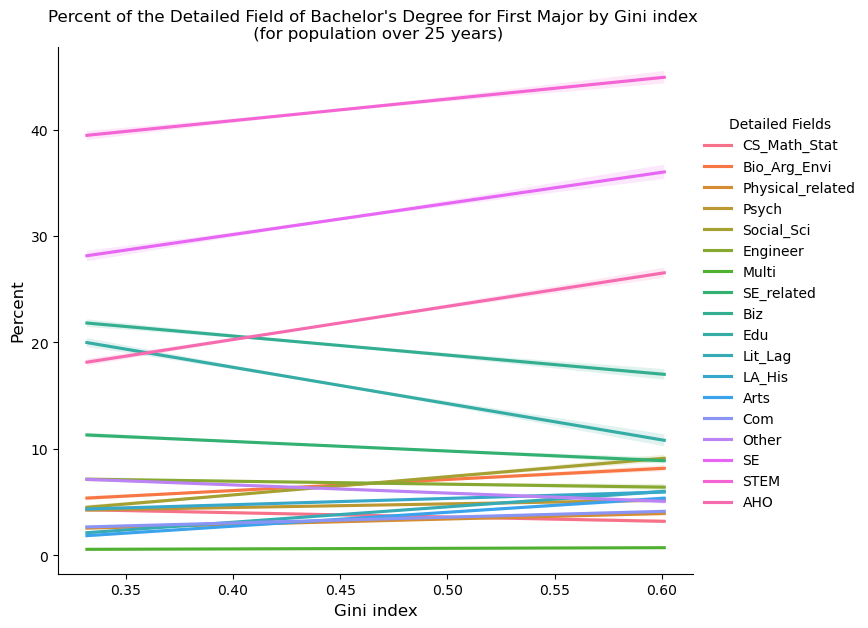

In [73]:
ax = sns.lmplot(x = "gini", y = "percent", hue = "major_group", scatter = False, ci = 95,
           data = df_master_long,
           height = 6, aspect = 1.2)

plt.title("Percent of the Detailed Field of Bachelor's Degree for First Major by Gini index \n (for population over 25 years)")

plt.xlabel('Gini index', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

ax._legend.set_title("Detailed Fields")

plt.show()

#### <i> Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index in Science & Engineering (for population over 25 years) <i>

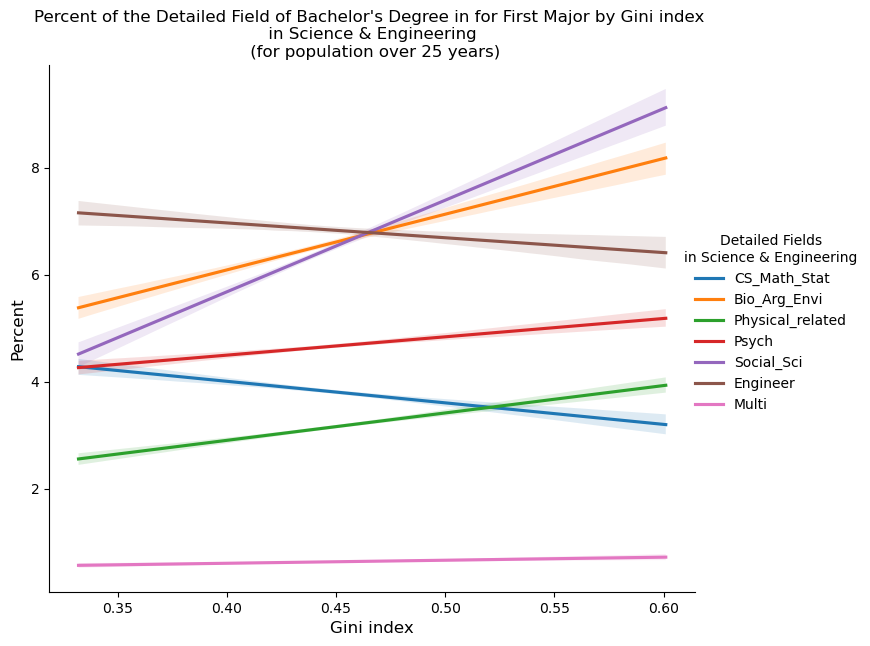

In [129]:
ax = sns.lmplot(x = "gini", y = "percent", hue = "major_group", scatter = False, ci = 95,
           data = df_master_long[df_master_long['major_group'].isin(['CS_Math_Stat', 'Bio_Arg_Envi', 
                                                                     'Physical_related', 'Engineer', 
                                                                     'Psych','Social_Sci','Multi'])],
           height = 6, aspect = 1.2)


plt.title("Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index \n in Science & Engineering \n (for population over 25 years)")

plt.xlabel('Gini index', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

ax._legend.set_title("Detailed Fields\nin Science & Engineering")
ax._legend.get_title().set_ha("center")

plt.show()

#### <i> Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index in Arts, Humanities and Others (for population over 25 years) <i>

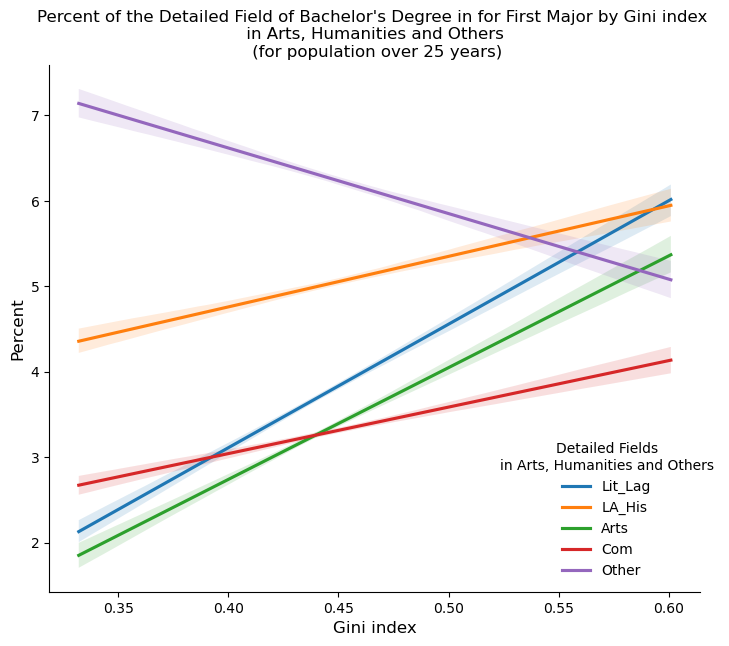

In [130]:
ax = sns.lmplot(x = "gini", y = "percent", hue = "major_group", scatter = False, ci = 95,
           data = df_master_long[df_master_long['major_group'].isin(['Lit_Lag', 'LA_His', 'Arts', 'Com', 'Other'])],
           height = 6, aspect = 1.2)

plt.title("Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index \n in Arts, Humanities and Others \n (for population over 25 years)")

plt.xlabel('Gini index', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

sns.move_legend(ax, 'lower right', bbox_to_anchor=(0.9, 0.1))

ax._legend.set_title("Detailed Fields\nin Arts, Humanities and Others")
ax._legend.get_title().set_ha("center")


plt.show()

#### <i> Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index in Aggregation (for population over 25 years) <i>

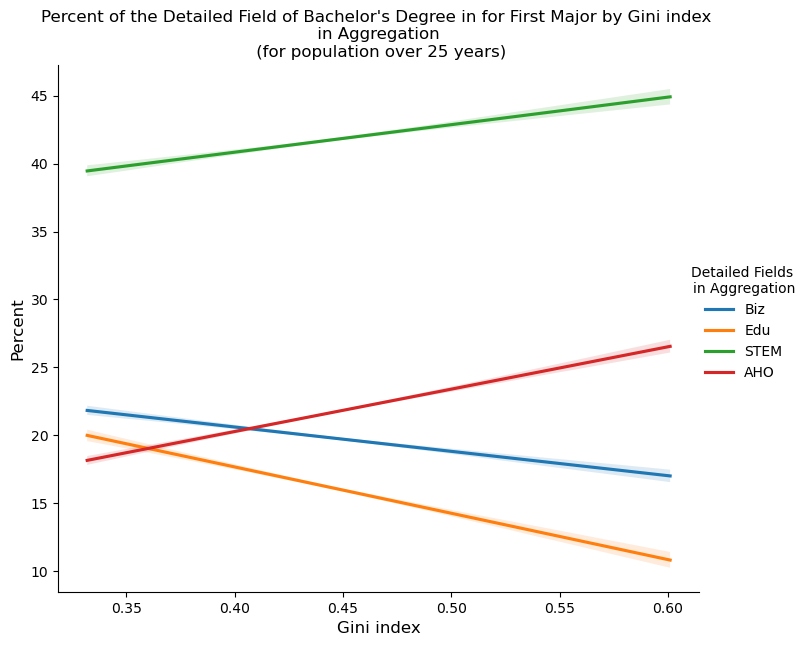

In [31]:
ax = sns.lmplot(x = "gini", y = "percent", hue = "major_group", scatter = False, ci = 95,
           data = df_master_long[df_master_long['major_group'].isin(['STEM','Biz','Edu','AHO'])],
           height = 6, aspect = 1.2)

plt.title("Percent of the Detailed Field of Bachelor's Degree in for First Major by Gini index \n in Aggregation \n (for population over 25 years)")

plt.xlabel('Gini index', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)


ax._legend.set_title("Detailed Fields \nin Aggregation")
ax._legend.get_title().set_ha("center")


plt.show()